<a href="https://colab.research.google.com/github/JerryK97/dl12/blob/main/project/dl12_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
## MNIST

In [8]:
# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0


model = models.Sequential()
# CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# DNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

(60000, 28, 28, 1) (60000,)


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

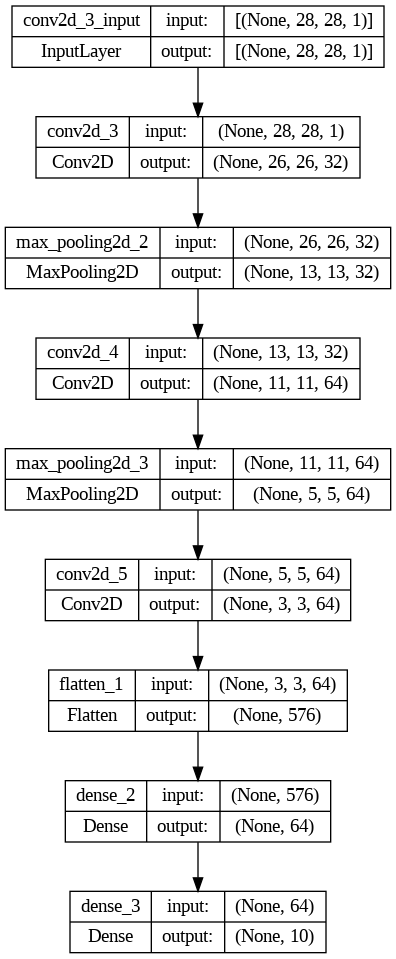

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1434 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0260 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.009

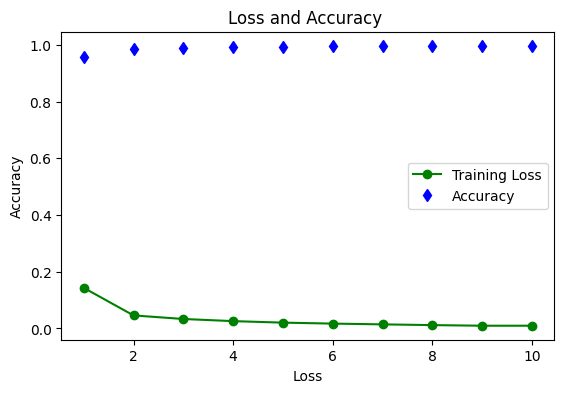

In [16]:
#
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
#
import numpy as np
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Accuracy')
#plt.plot(np.argmin(np.array(accuracy))+1,accuracy[np.argmin(np.array(accuracy))], 'r*', ms=12)
plt.title('Loss and Accuracy ') # + str(np.round(accuracy[np.argmin(np.array(accuracy))],2)))
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()

In [17]:
#
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
#
# 모델을 테스트 데이터에 적용하여 예측값 계산
predictions = model.predict(test_images)

# 예측값에서 가장 큰 확률을 갖는 클래스 선택
predicted_labels = np.argmax(predictions, axis=1)

# 정확도 계산
accuracy = np.mean(predicted_labels == test_labels)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9933


In [18]:
#
# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# 그리고 training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
#
from tensorflow.keras import datasets, layers, models

# 데이터 준비
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화한다.
train_images, test_images = train_images / 255.0, test_images / 255.0

# 검증 데이터 분리
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.1601 - accuracy: 0.9509 - val_loss: 0.0974 - val_accuracy: 0.9736
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0450 - val_accuracy: 0.9874
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0402 - val_accuracy: 0.9876
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0307 - val_accuracy: 0.9918
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0291 - val_accuracy: 0.9918
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0353 - val_accuracy

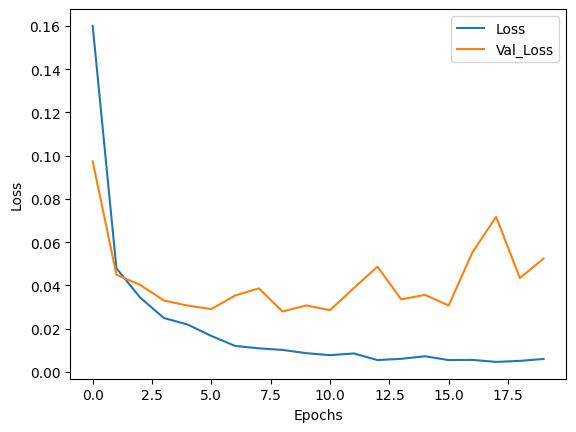

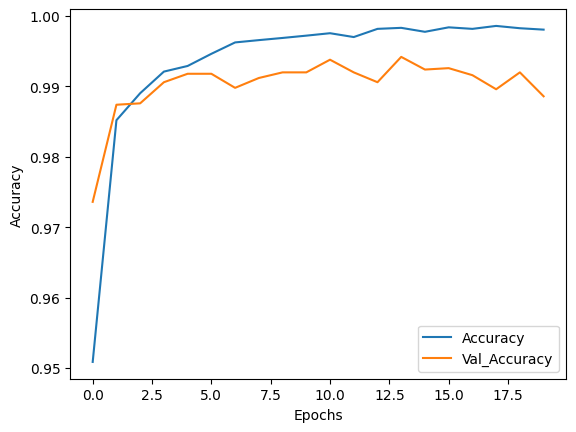

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# 손실 그래프 그리기
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 그리기
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()